In [1]:
%matplotlib inline
%load_ext dotenv
%dotenv env.sh
import pandas as pd
import numpy as np
import plotnine as pn
import os
import os.path as osp
from cytokit import config as ck_config
from cytokit.function import data as ck_data
exp_variant = 'v00'

In [2]:
df = pd.read_csv('experiments.csv')
df['has_peptide'] = df['cond'].str.match(r'.*\-wp(\-|$)').map({True: 'w/ Peptide', False: 'No Peptide'})
df['cell_count'] = df['name'].str.extract(r'([\d.]+kT)', expand=False)
df['sta_conc'] = df['name'].str.extract(r'([\d.]+uM)', expand=False)
df['label'] = df.apply(lambda r: '{}-{}-r{:01d}'.format(r['cell_count'], r['sta_conc'], r['rep']), axis=1)
df['key'] = df.apply(lambda r: '{}-{}-{}'.format(r['has_peptide'], r['sta_conc'], r['cell_count']), axis=1)
df['rep'] = df['rep'].apply(lambda v: 'r{}'.format(v))
df['output_dir'] = df.apply(lambda r: osp.join(os.environ['EXP_GROUP_OUT_DIR'], r['name'], exp_variant), axis=1)

# Filter to experiments with data and load config
df = df[df.apply(lambda r: osp.exists(osp.join(r['output_dir'], 'cytometry', 'data.csv')), axis=1)]
df['config'] = df.apply(lambda r: ck_config.load(osp.join(r['output_dir'], 'config')), axis=1)
df.head()

,name,conf,dir,grid,n_ch,n_tiles,n_z,cond,rep,z_pitch,has_peptide,cell_count,sta_conc,label,key,output_dir,config
0,0000kT-0uM-np-XY01-1,experiment.yaml,noTcells,XY01,4,33,9,0000kT-0uM-np,r1,200,No Peptide,0000kT,0uM,0000kT-0uM-r1,No Peptide-0uM-0000kT,/lab/data/spheroid/20190822-co-culture/output/...,"{'environment': {'path_formats': ""get_default_..."
1,0000kT-0uM-np-XY02-2,experiment.yaml,noTcells,XY02,4,33,8,0000kT-0uM-np,r2,200,No Peptide,0000kT,0uM,0000kT-0uM-r2,No Peptide-0uM-0000kT,/lab/data/spheroid/20190822-co-culture/output/...,"{'environment': {'path_formats': ""get_default_..."
2,0000kT-0uM-np-XY03-3,experiment.yaml,noTcells,XY03,4,33,8,0000kT-0uM-np,r3,200,No Peptide,0000kT,0uM,0000kT-0uM-r3,No Peptide-0uM-0000kT,/lab/data/spheroid/20190822-co-culture/output/...,"{'environment': {'path_formats': ""get_default_..."
3,0000kT-4uM-np-XY01-1,experiment.yaml,4uMsta,XY01,4,33,7,0000kT-4uM-np,r1,200,No Peptide,0000kT,4uM,0000kT-4uM-r1,No Peptide-4uM-0000kT,/lab/data/spheroid/20190822-co-culture/output/...,"{'environment': {'path_formats': ""get_default_..."
4,0000kT-4uM-np-XY02-2,experiment.yaml,4uMsta,XY02,4,33,10,0000kT-4uM-np,r2,200,No Peptide,0000kT,4uM,0000kT-4uM-r2,No Peptide-4uM-0000kT,/lab/data/spheroid/20190822-co-culture/output/...,"{'environment': {'path_formats': ""get_default_..."


### Cell Data 

In [3]:
dfa = pd.concat([
    ck_data.get_cytometry_data(r['output_dir'], r['config']).assign(**r[[
        'name', 'grid', 'cond', 'has_peptide', 'cell_count', 'sta_conc', 'label', 'rep', 'key'
    ]].add_prefix('exp:').to_dict())
    for i, r in df.iterrows()
])
dfa = dfa.rename(columns=lambda c: c.replace(':', '_'))
dfa.head()

,region_index,tile_index,tile_x,tile_y,rid,rx,ry,id,x,y,...,ni_SPHEROID_mean,exp_cell_count,exp_cond,exp_grid,exp_has_peptide,exp_key,exp_label,exp_name,exp_rep,exp_sta_conc
0,0,0,0,0,0,638.490468,482.646447,1,638.490468,482.646447,...,0.0,0000kT,0000kT-0uM-np,XY01,No Peptide,No Peptide-0uM-0000kT,0000kT-0uM-r1,0000kT-0uM-np-XY01-1,r1,0uM
1,0,0,0,0,1,900.194575,304.517689,1,900.194575,304.517689,...,0.0,0000kT,0000kT-0uM-np,XY01,No Peptide,No Peptide-0uM-0000kT,0000kT-0uM-r1,0000kT-0uM-np-XY01-1,r1,0uM
2,0,0,0,0,2,870.968023,6.773256,1,870.968023,6.773256,...,0.0,0000kT,0000kT-0uM-np,XY01,No Peptide,No Peptide-0uM-0000kT,0000kT-0uM-r1,0000kT-0uM-np-XY01-1,r1,0uM
3,0,0,0,0,3,241.434667,446.746667,2,241.434667,446.746667,...,0.0,0000kT,0000kT-0uM-np,XY01,No Peptide,No Peptide-0uM-0000kT,0000kT-0uM-r1,0000kT-0uM-np-XY01-1,r1,0uM
4,0,0,0,0,4,867.361888,8.847902,1,867.361888,8.847902,...,0.0,0000kT,0000kT-0uM-np,XY01,No Peptide,No Peptide-0uM-0000kT,0000kT-0uM-r1,0000kT-0uM-np-XY01-1,r1,0uM


In [4]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176879 entries, 0 to 86
Data columns (total 46 columns):
region_index        176879 non-null object
tile_index          176879 non-null object
tile_x              176879 non-null object
tile_y              176879 non-null object
rid                 176879 non-null int64
rx                  176879 non-null float64
ry                  176879 non-null float64
id                  176879 non-null object
x                   176879 non-null float64
y                   176879 non-null float64
z                   176879 non-null object
cm_circularity      176879 non-null float64
cm_diameter         176879 non-null float64
cm_diameter_vx      176879 non-null float64
cm_perimeter        176879 non-null float64
cm_size             176879 non-null float64
cm_size_vx          176879 non-null object
cm_solidity         176879 non-null float64
nm_circularity      176879 non-null float64
nm_diameter         176879 non-null float64
nm_diameter_vx      17

In [5]:
dfa['cb_on_border'].value_counts()

0    167706
1      9173
Name: cb_on_border, dtype: int64

In [6]:
def select_z_plane(g):
    z = g['z'].value_counts().idxmax()
    return g[g['z'] == z]

dfs = (
    dfa
    # Restrict to cells in a spheroid
    .pipe(lambda df: df[df['ci_SPHEROID_mean'] > 0])
    # Select z plane with most cells
    .groupby(['exp_name', 'tile_index'], group_keys=False).apply(select_z_plane)
)
assert (dfs.groupby(['exp_name', 'tile_index'])['z'].nunique() == 1).all()
dfs.groupby(['exp_name', 'tile_index'])['z'].max().unstack().fillna(0).astype(int)

tile_index,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
exp_name,,,,,,,,,,,,,,,,,,,,,
0000kT-0uM-np-XY01-1,0,6,6,6,7,6,6,6,6,6,...,6,5,6,4,6,6,6,6,6,7
0000kT-0uM-np-XY02-2,5,0,6,5,6,5,5,5,5,6,...,5,5,5,5,4,5,6,6,5,5
0000kT-0uM-np-XY03-3,5,4,4,5,4,5,5,4,5,4,...,4,5,6,3,5,5,4,5,0,0
0000kT-4uM-np-XY01-1,4,4,4,4,4,3,4,4,4,3,...,4,4,4,4,4,4,4,4,4,4
0000kT-4uM-np-XY02-2,7,7,7,7,6,7,7,7,7,7,...,7,6,7,6,7,7,6,7,7,7
0000kT-4uM-np-XY03-3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,3
0250kT-0uM-np-XY07-1,5,5,5,5,5,4,4,4,5,5,...,4,4,4,4,3,4,4,4,4,4
0250kT-0uM-np-XY08-2,5,5,6,5,5,5,5,5,5,5,...,5,4,5,4,4,4,5,4,4,4
0250kT-0uM-np-XY09-3,4,4,3,4,4,4,4,4,4,4,...,4,3,3,3,3,3,3,2,3,2


In [7]:
dfsct = dfs.groupby(['exp_name', 'exp_key', 'exp_has_peptide', 'exp_rep', 'exp_sta_conc']).size().rename('value').reset_index()
dfsct

,exp_name,exp_key,exp_has_peptide,exp_rep,exp_sta_conc,value
0,0000kT-0uM-np-XY01-1,No Peptide-0uM-0000kT,No Peptide,r1,0uM,2386
1,0000kT-0uM-np-XY02-2,No Peptide-0uM-0000kT,No Peptide,r2,0uM,903
2,0000kT-0uM-np-XY03-3,No Peptide-0uM-0000kT,No Peptide,r3,0uM,643
3,0000kT-4uM-np-XY01-1,No Peptide-4uM-0000kT,No Peptide,r1,4uM,1341
4,0000kT-4uM-np-XY02-2,No Peptide-4uM-0000kT,No Peptide,r2,4uM,1899
5,0000kT-4uM-np-XY03-3,No Peptide-4uM-0000kT,No Peptide,r3,4uM,2505
6,0250kT-0uM-np-XY07-1,No Peptide-0uM-0250kT,No Peptide,r1,0uM,2602
7,0250kT-0uM-np-XY08-2,No Peptide-0uM-0250kT,No Peptide,r2,0uM,2840
8,0250kT-0uM-np-XY09-3,No Peptide-0uM-0250kT,No Peptide,r3,0uM,2328
9,0250kT-0uM-wp-XY04-1,w/ Peptide-0uM-0250kT,w/ Peptide,r1,0uM,2697


In [8]:
def plot_series(df, width=.1):
    dfg = df.groupby(['exp_key', 'exp_has_peptide', 'exp_sta_conc'])['value'].mean().rename('value').reset_index()
    return (
        pn.ggplot(df, pn.aes(x='exp_key', y='value')) + 
        pn.geom_jitter(
            width=width, height=0, random_state=0, 
            mapping=pn.aes(fill='exp_rep', color='exp_rep', shape='exp_has_peptide', size='exp_sta_conc')
        ) + 
        pn.geom_point(data=dfg, mapping=pn.aes(x='exp_key', y='value', shape='exp_has_peptide', size='exp_sta_conc'), color='black', fill='black') +
        pn.geom_line(data=dfg, mapping=pn.aes(x='exp_key', y='value', group=1)) +
        pn.theme_bw() + 
        pn.labs(x='Condition', color='Replicate', fill='Replicate', shape='Peptide', size='STA') + 
        pn.scale_size_discrete(range=(3, 5)) + 
        pn.theme(figure_size=(12, 4), axis_text_x=pn.element_text(rotation=45, hjust=1))
    )

In [9]:
dfsct[dfsct['exp_key'] == 'No Peptide-0uM-2000kT']

,exp_name,exp_key,exp_has_peptide,exp_rep,exp_sta_conc,value
23,2000kT-0uM-np-XY01-1,No Peptide-0uM-2000kT,No Peptide,r1,0uM,526
24,2000kT-0uM-np-XY02-2,No Peptide-0uM-2000kT,No Peptide,r2,0uM,160
25,2000kT-0uM-np-XY03-3,No Peptide-0uM-2000kT,No Peptide,r3,0uM,1293


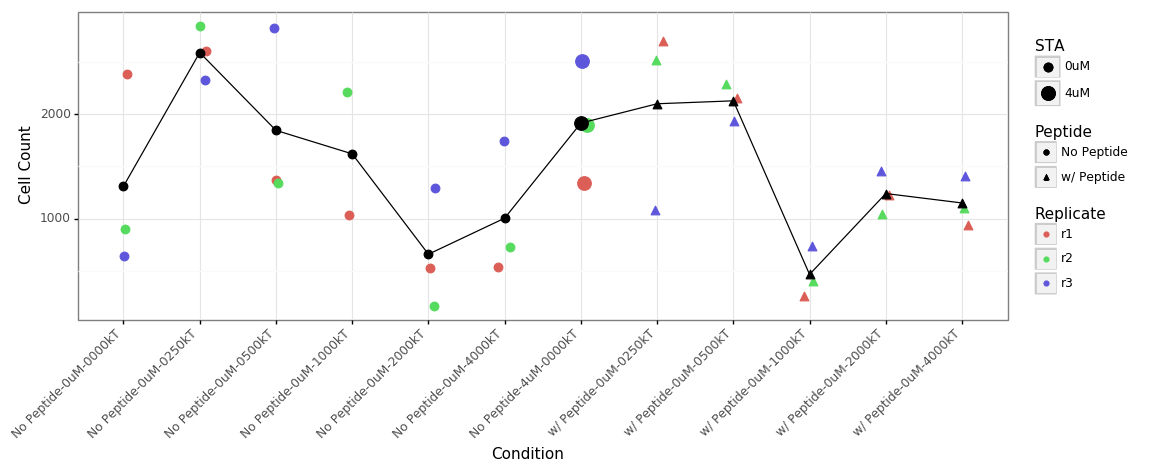

<ggplot: (8731118013802)>

In [10]:
plot_series(dfsct) + pn.labs(y='Cell Count')

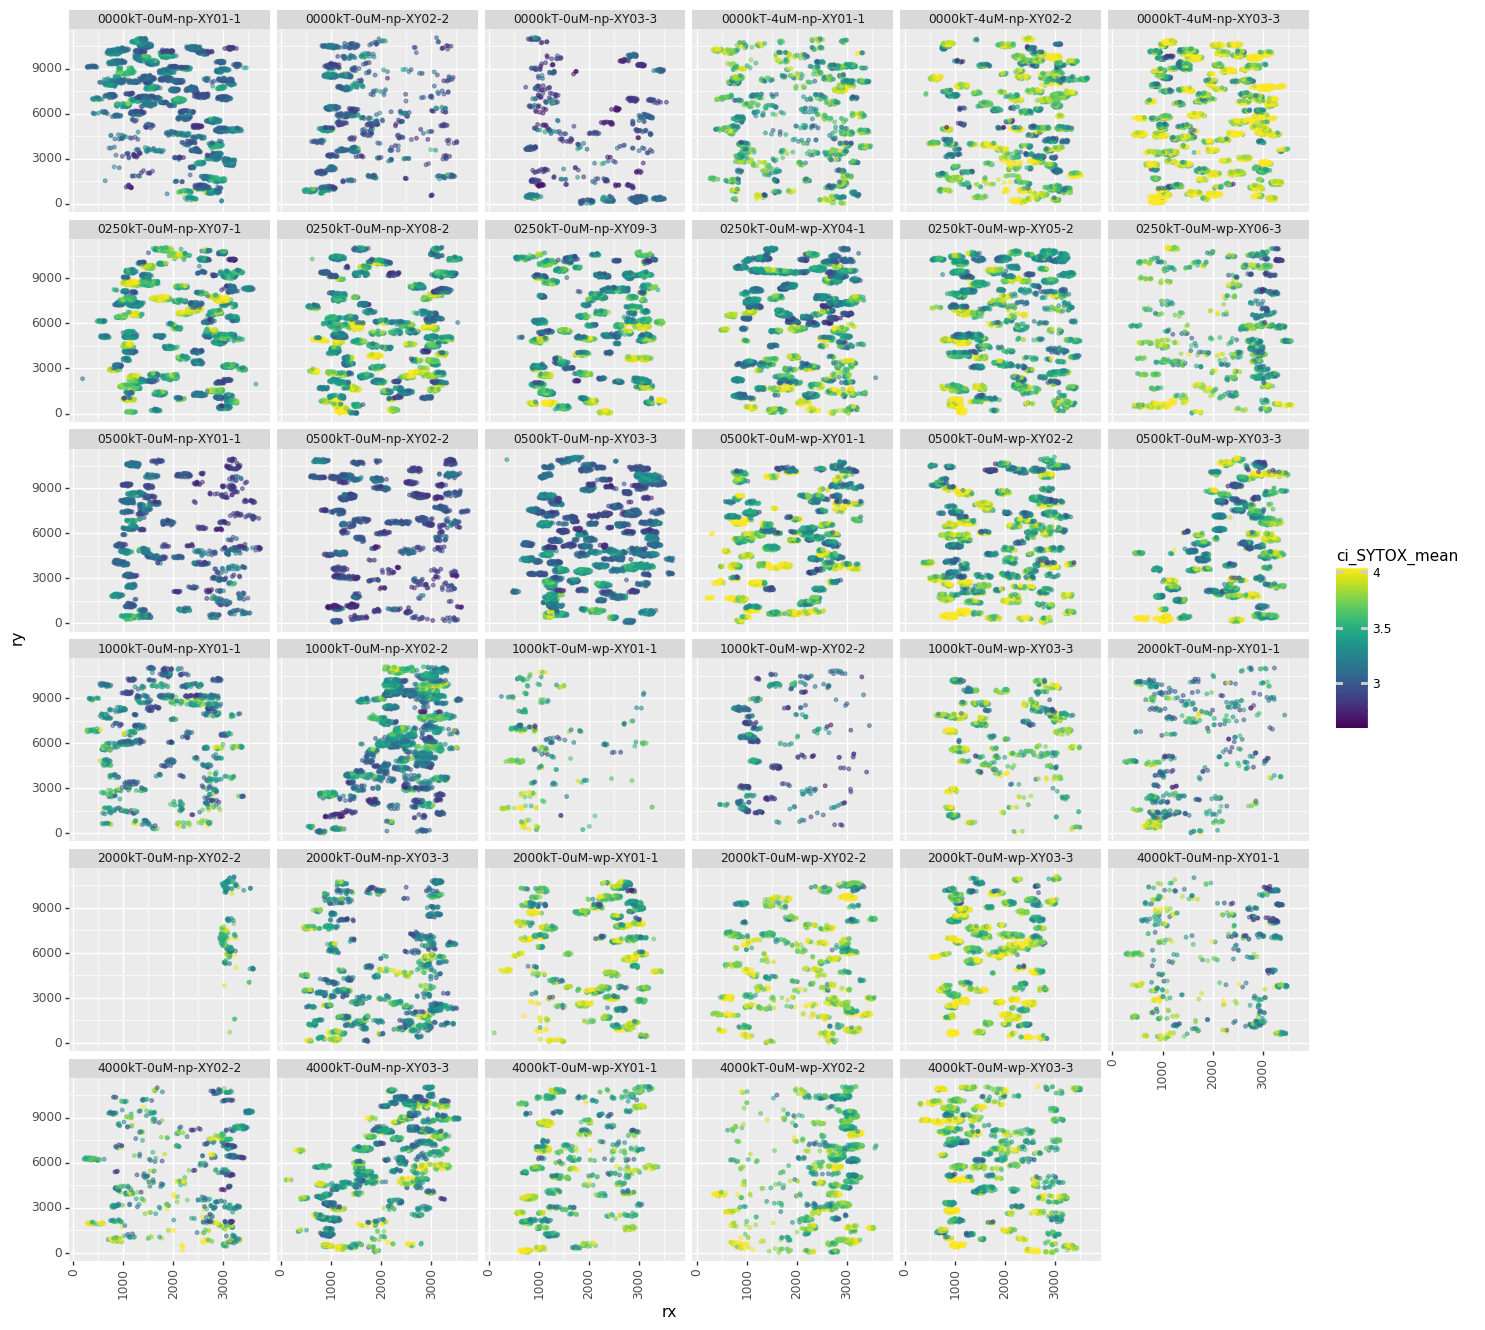

<ggplot: (8731115647850)>

In [11]:
(
    pn.ggplot(
        dfs.assign(ci_SYTOX_mean=lambda df: df['ci_SYTOX_mean'].apply(np.log10).clip(0, 4)), 
        pn.aes(x='rx', y='ry', fill='ci_SYTOX_mean', color='ci_SYTOX_mean')
    ) + 
    pn.geom_point(size=1, alpha=.5) + 
    pn.facet_wrap('~exp_name') + 
    pn.theme(axis_text_x=pn.element_text(rotation=90), figure_size=(16, 16))
)

In [12]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52473 entries, 38 to 48
Data columns (total 46 columns):
region_index        52473 non-null object
tile_index          52473 non-null object
tile_x              52473 non-null object
tile_y              52473 non-null object
rid                 52473 non-null int64
rx                  52473 non-null float64
ry                  52473 non-null float64
id                  52473 non-null object
x                   52473 non-null float64
y                   52473 non-null float64
z                   52473 non-null object
cm_circularity      52473 non-null float64
cm_diameter         52473 non-null float64
cm_diameter_vx      52473 non-null float64
cm_perimeter        52473 non-null float64
cm_size             52473 non-null float64
cm_size_vx          52473 non-null object
cm_solidity         52473 non-null float64
nm_circularity      52473 non-null float64
nm_diameter         52473 non-null float64
nm_diameter_vx      52473 non-null float64

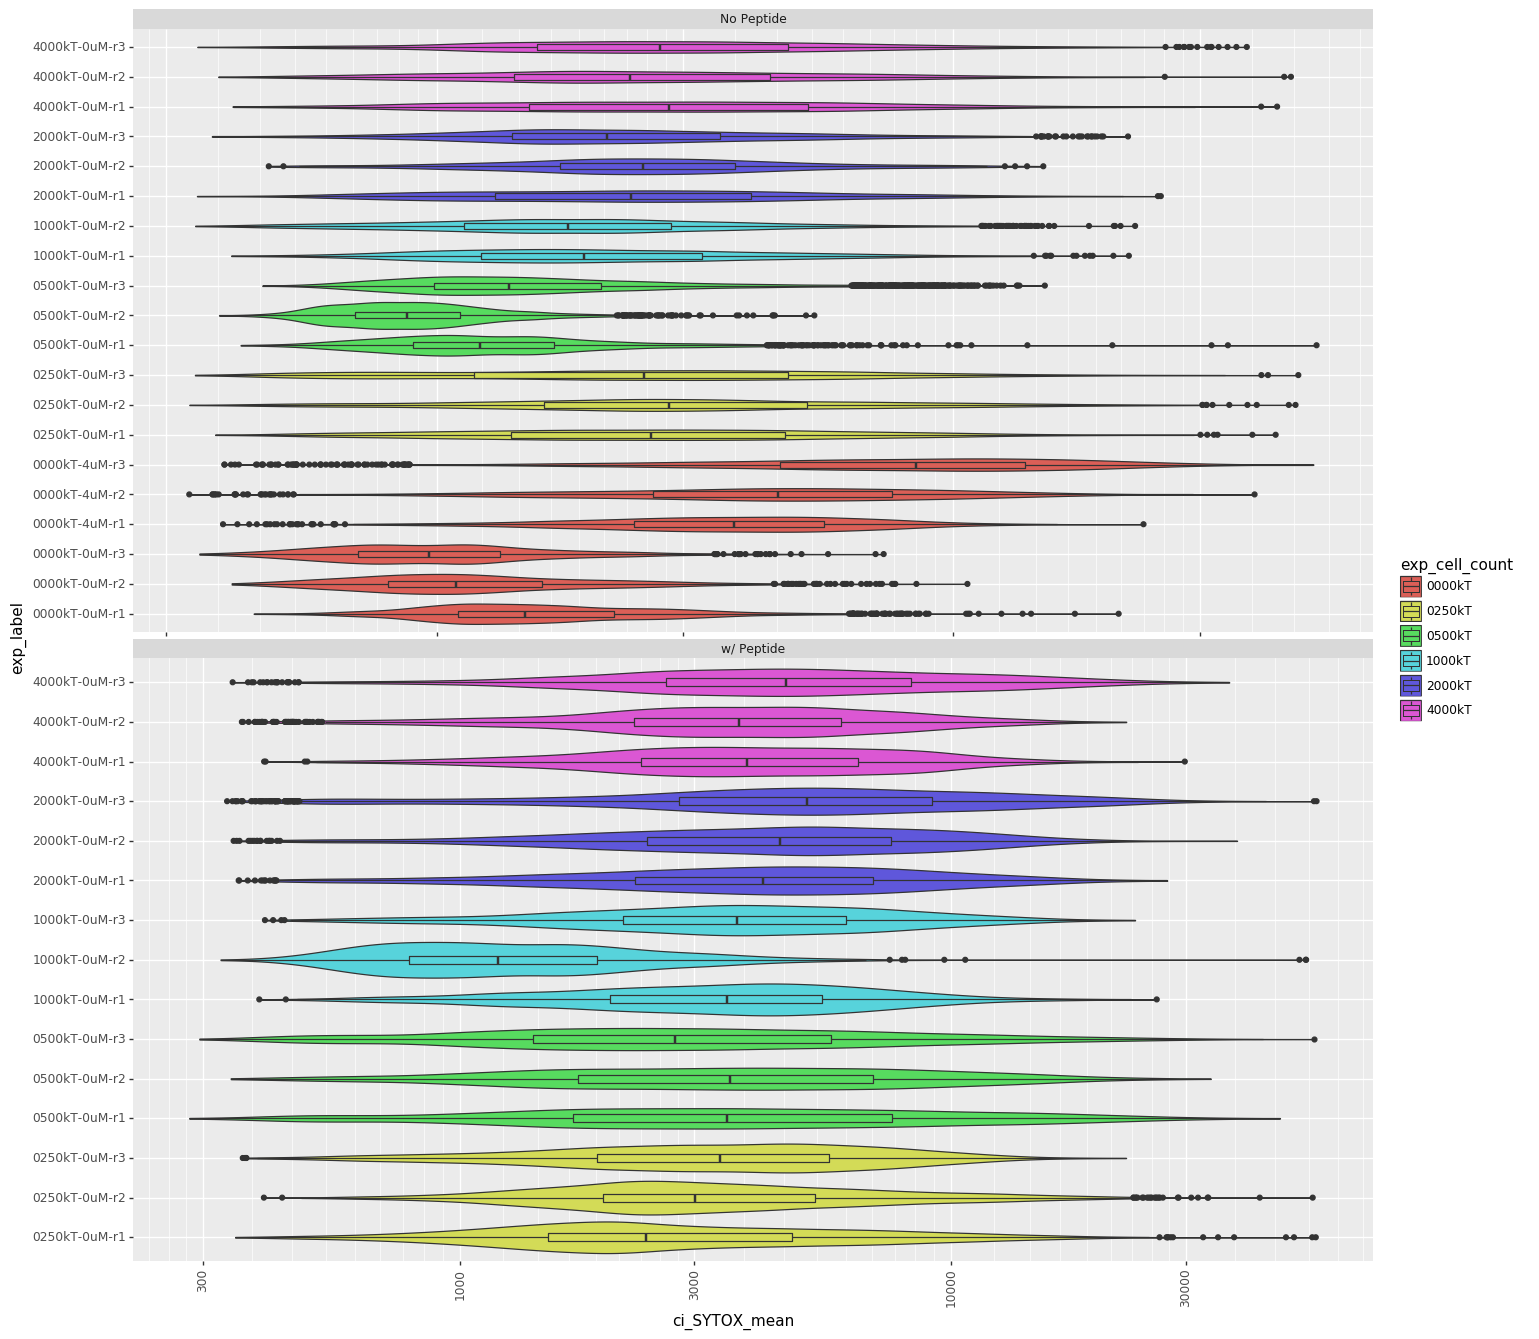

<ggplot: (8731094078556)>

In [13]:
(
    pn.ggplot(
        dfa,
        pn.aes(x='exp_label', y='ci_SYTOX_mean', fill='exp_cell_count')
    ) + 
    pn.geom_violin() + 
    pn.geom_boxplot(width=.2) + 
    pn.coord_flip() + 
    pn.scale_y_log10() +
    pn.facet_wrap('~ exp_has_peptide', ncol=1, nrow=2, scales='free') + 
    pn.theme(axis_text_x=pn.element_text(rotation=90), figure_size=(16, 16))
)

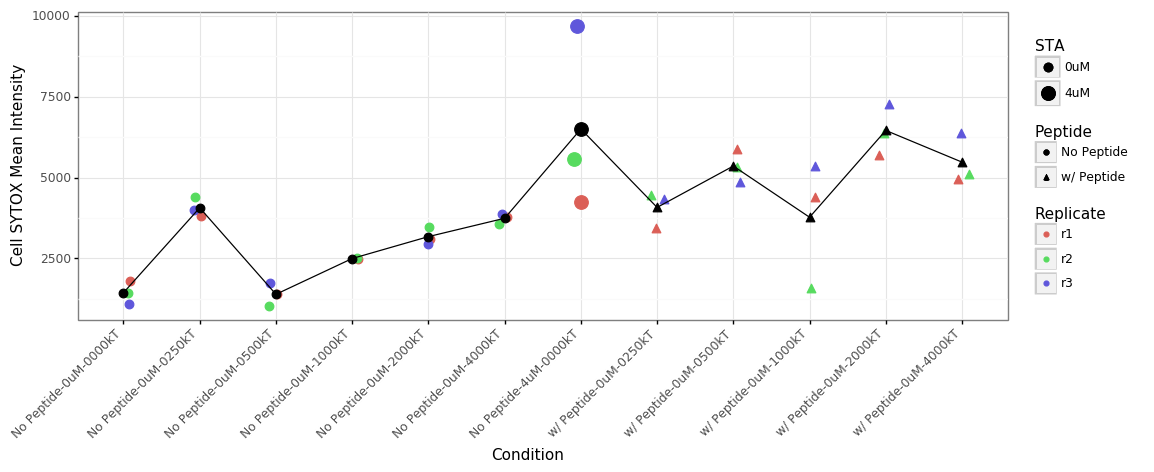

<ggplot: (8730963394403)>

In [14]:
dfsval = dfs.groupby(['exp_name', 'exp_key', 'exp_has_peptide', 'exp_rep', 'exp_sta_conc'])['ci_SYTOX_mean'].mean().rename('value').reset_index()
plot_series(dfsval) + pn.labs(y='Cell SYTOX Mean Intensity')

### Spheroid Data

In [43]:
dfsh = pd.concat([
    pd.read_csv(osp.join(r['output_dir'], 'cytometry', 'data.spheroid.csv')).assign(**r[[
        'name', 'grid', 'cond', 'has_peptide', 'cell_count', 'sta_conc', 'label', 'rep', 'key'
    ]].add_prefix('exp:').to_dict())
    for i, r in df.iterrows()
])
dfsh = dfsh.rename(columns=lambda c: c.replace(':', '_'))
dfsh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3076 entries, 0 to 88
Data columns (total 29 columns):
id                 3076 non-null int64
x                  3076 non-null float64
y                  3076 non-null float64
z                  3076 non-null int64
cm_circularity     3076 non-null float64
cm_diameter        3076 non-null float64
cm_perimeter       3076 non-null float64
cm_size            3076 non-null int64
cm_solidity        3076 non-null float64
nm_circularity     3076 non-null float64
nm_diameter        3076 non-null float64
nm_perimeter       3076 non-null float64
nm_size            3076 non-null int64
nm_solidity        3076 non-null float64
cb_on_border       3076 non-null int64
nb_on_border       3076 non-null int64
ci_SYTOX_mean      3076 non-null float64
ci_ICYTE_mean      3076 non-null float64
ci_HOECHST_mean    3076 non-null float64
ci_BF_mean         3076 non-null float64
exp_cell_count     3076 non-null object
exp_cond           3076 non-null object
exp_gri

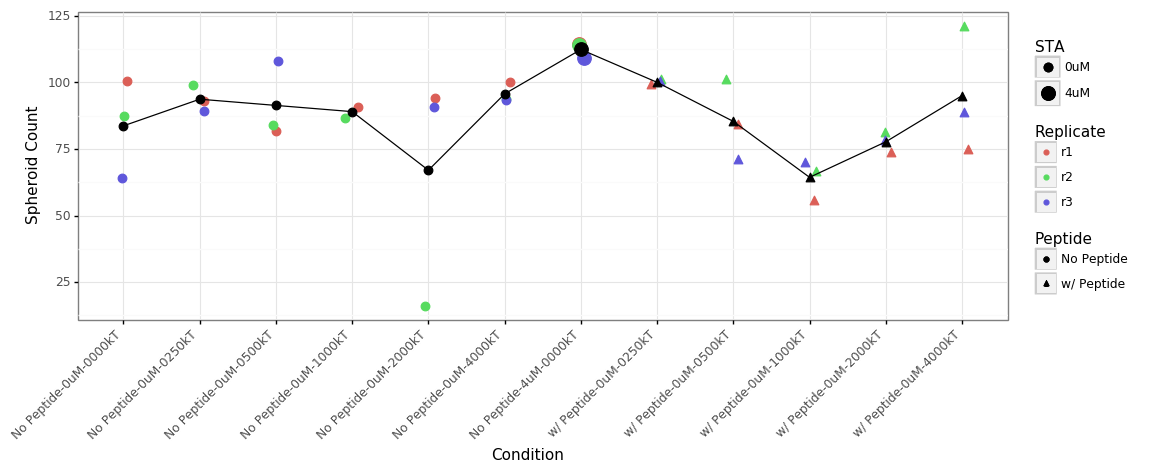

<ggplot: (8749720729492)>

In [44]:
dfshct = dfsh.groupby(['exp_name', 'exp_key', 'exp_has_peptide', 'exp_rep', 'exp_sta_conc']).size().rename('value').reset_index()
plot_series(dfshct) + pn.labs(y='Spheroid Count')

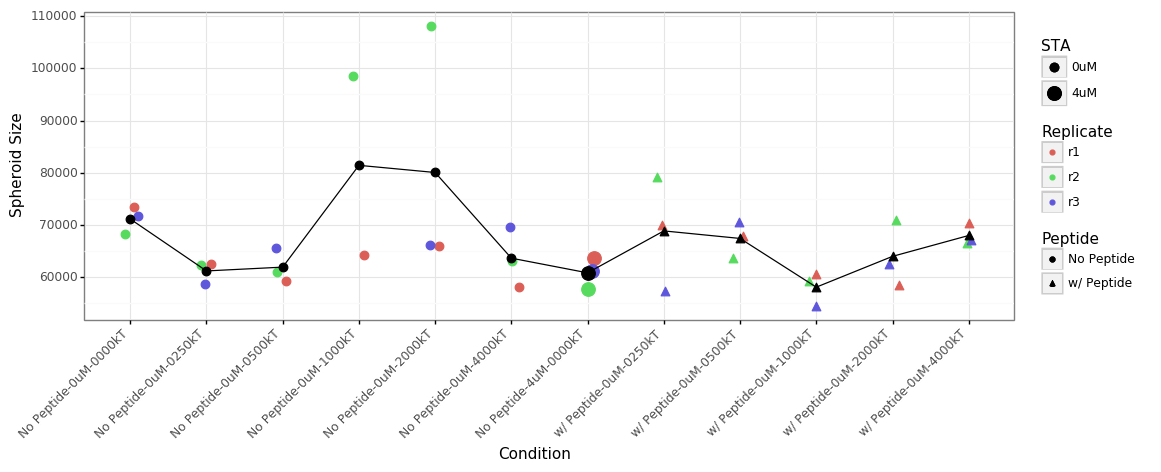

<ggplot: (8749714108399)>

In [45]:
dfshsz = dfsh.groupby(['exp_name', 'exp_key', 'exp_has_peptide', 'exp_rep', 'exp_sta_conc'])['cm_size'].mean().rename('value').reset_index()
plot_series(dfshsz) + pn.labs(y='Spheroid Size')

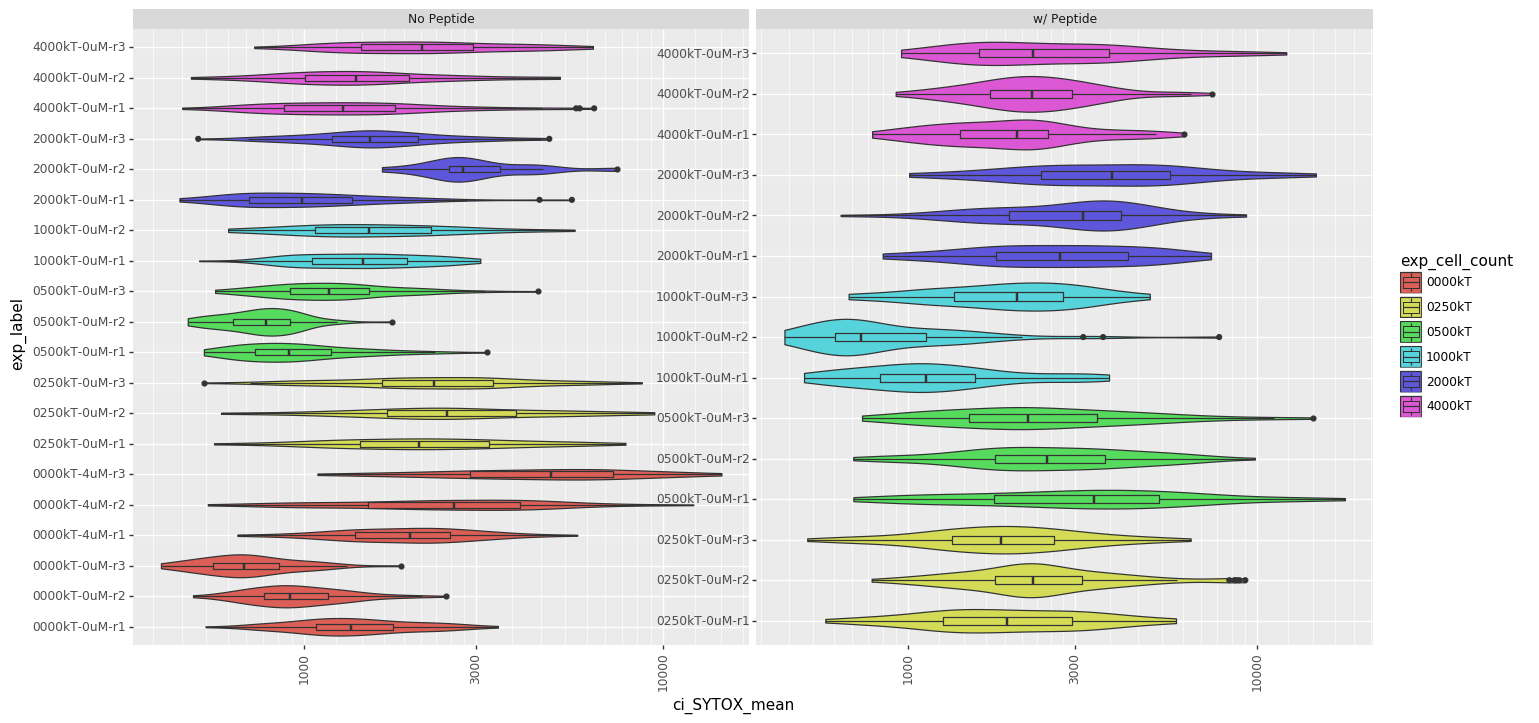

<ggplot: (8749830475528)>

In [46]:
(
    pn.ggplot(
        dfsh,
        pn.aes(x='exp_label', y='ci_SYTOX_mean', fill='exp_cell_count')
    ) + 
    pn.geom_violin() + 
    pn.geom_boxplot(width=.2) + 
    pn.coord_flip() + 
    pn.scale_y_log10() +
    pn.facet_wrap('~ exp_has_peptide', ncol=2, nrow=1, scales='free') + 
    pn.theme(axis_text_x=pn.element_text(rotation=90), figure_size=(16, 8))
)

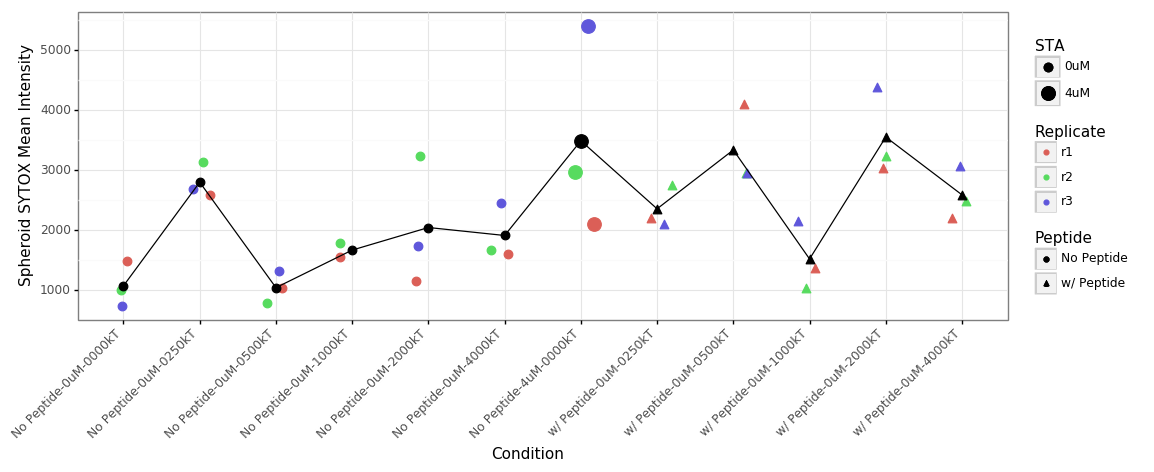

<ggplot: (-9223363286981622524)>

In [47]:
dfshval = dfsh.groupby(['exp_name', 'exp_key', 'exp_has_peptide', 'exp_rep', 'exp_sta_conc'])['ci_SYTOX_mean'].mean().rename('value').reset_index()
plot_series(dfshval, width=.2) + pn.labs(y='Spheroid SYTOX Mean Intensity')

In [48]:
dfsh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3076 entries, 0 to 88
Data columns (total 29 columns):
id                 3076 non-null int64
x                  3076 non-null float64
y                  3076 non-null float64
z                  3076 non-null int64
cm_circularity     3076 non-null float64
cm_diameter        3076 non-null float64
cm_perimeter       3076 non-null float64
cm_size            3076 non-null int64
cm_solidity        3076 non-null float64
nm_circularity     3076 non-null float64
nm_diameter        3076 non-null float64
nm_perimeter       3076 non-null float64
nm_size            3076 non-null int64
nm_solidity        3076 non-null float64
cb_on_border       3076 non-null int64
nb_on_border       3076 non-null int64
ci_SYTOX_mean      3076 non-null float64
ci_ICYTE_mean      3076 non-null float64
ci_HOECHST_mean    3076 non-null float64
ci_BF_mean         3076 non-null float64
exp_cell_count     3076 non-null object
exp_cond           3076 non-null object
exp_gri

### Horizontal Staining Bias

In [49]:
dfsh['exp_name'].unique()

array(['0000kT-0uM-np-XY01-1', '0000kT-0uM-np-XY02-2',
       '0000kT-0uM-np-XY03-3', '0000kT-4uM-np-XY01-1',
       '0000kT-4uM-np-XY02-2', '0000kT-4uM-np-XY03-3',
       '0250kT-0uM-np-XY07-1', '0250kT-0uM-np-XY08-2',
       '0250kT-0uM-np-XY09-3', '0250kT-0uM-wp-XY04-1',
       '0250kT-0uM-wp-XY05-2', '0250kT-0uM-wp-XY06-3',
       '0500kT-0uM-np-XY01-1', '0500kT-0uM-np-XY02-2',
       '0500kT-0uM-np-XY03-3', '0500kT-0uM-wp-XY01-1',
       '0500kT-0uM-wp-XY02-2', '0500kT-0uM-wp-XY03-3',
       '1000kT-0uM-np-XY01-1', '1000kT-0uM-np-XY02-2',
       '1000kT-0uM-wp-XY01-1', '1000kT-0uM-wp-XY02-2',
       '1000kT-0uM-wp-XY03-3', '2000kT-0uM-np-XY01-1',
       '2000kT-0uM-np-XY02-2', '2000kT-0uM-np-XY03-3',
       '2000kT-0uM-wp-XY01-1', '2000kT-0uM-wp-XY02-2',
       '2000kT-0uM-wp-XY03-3', '4000kT-0uM-np-XY01-1',
       '4000kT-0uM-np-XY02-2', '4000kT-0uM-np-XY03-3',
       '4000kT-0uM-wp-XY01-1', '4000kT-0uM-wp-XY02-2',
       '4000kT-0uM-wp-XY03-3'], dtype=object)

In [50]:
bad_exps = [
    '2000kT-0uM-np-XY02-2',
    '0500kT-0uM-np-XY03-3',
]

In [51]:
(
    dfsh
    .pipe(lambda df: df[~df['exp_name'].isin(bad_exps)])
    .assign(pos=lambda df: pd.cut(df['x'], bins=10))
    .groupby(['exp_name','exp_has_peptide', 'exp_sta_conc', 'pos'])['ci_SYTOX_mean'].mean().rename('value').reset_index()
    .groupby(['exp_name','exp_has_peptide', 'exp_sta_conc'])
    .apply(lambda g: g.set_index('pos')['value'].rolling(window=3, min_periods=1, center=True).mean())
    .rename('value').reset_index()
).head()

,exp_name,exp_has_peptide,exp_sta_conc,pos,value
0,0000kT-0uM-np-XY01-1,No Peptide,0uM,"(136.838, 494.88]",1632.992647
1,0000kT-0uM-np-XY01-1,No Peptide,0uM,"(494.88, 849.377]",1609.991756
2,0000kT-0uM-np-XY01-1,No Peptide,0uM,"(849.377, 1203.874]",1499.824983
3,0000kT-0uM-np-XY01-1,No Peptide,0uM,"(1203.874, 1558.371]",1465.630935
4,0000kT-0uM-np-XY01-1,No Peptide,0uM,"(1558.371, 1912.869]",1454.686203


In [52]:
dfsh['x'].describe()

count    3076.000000
mean     2021.206718
std       834.105267
min       140.383144
25%      1263.598788
50%      2062.860826
75%      2785.090590
max      3685.353974
Name: x, dtype: float64

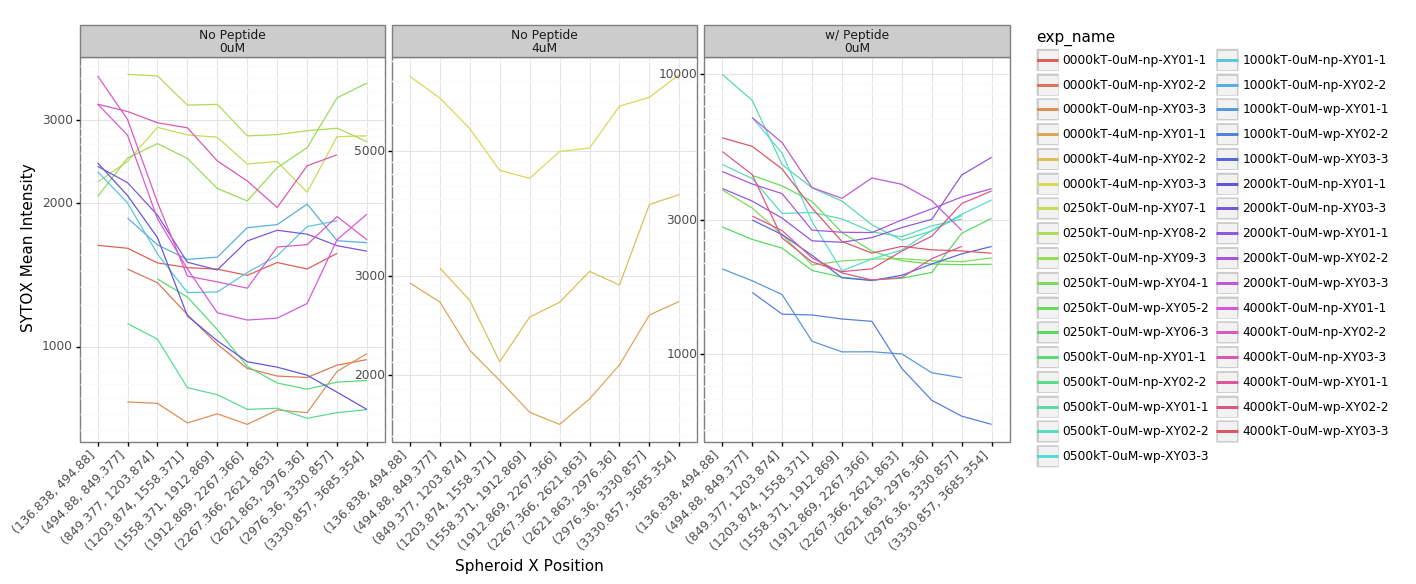

<ggplot: (8749873163591)>

In [54]:
dfp = (
    dfsh
    .pipe(lambda df: df[~df['exp_name'].isin(bad_exps)])
    .assign(pos=lambda df: pd.cut(df['x'], bins=10))
    .groupby(['exp_name','exp_has_peptide', 'exp_sta_conc', 'pos'])['ci_SYTOX_mean'].mean().rename('value').reset_index()
    .groupby(['exp_name','exp_has_peptide', 'exp_sta_conc'])
    .apply(lambda g: g.set_index('pos')['value'].rolling(window=3, min_periods=1, center=True).mean())
    .rename('value').reset_index()
)
(
    pn.ggplot(
        dfp,
        pn.aes(x='pos', y='value', color='exp_name', group='exp_name')
    ) + 
    pn.geom_line() +
    pn.facet_wrap('~ exp_has_peptide + exp_sta_conc', scales='free_y') + 
    pn.scale_y_log10() + 
    pn.labs(x='Spheroid X Position', y='SYTOX Mean Intensity') + 
    pn.theme_bw() + 
    pn.theme(figure_size=(12, 5), axis_text_x=pn.element_text(rotation=45, hjust=1))
)